## 1. Loading data into a dictionary
<p><img src="https://assets.datacamp.com/production/project_1237/img/netflix.jpg" alt="Someone's feet on table facing a television"></p>
<p>Netflix! What started in 1997 as a DVD rental service has since exploded into the largest entertainment/media company by <a href="https://www.marketwatch.com/story/netflix-shares-close-up-8-for-yet-another-record-high-2020-07-10">market capitalization</a>, boasting over 200 million subscribers as of <a href="https://www.cbsnews.com/news/netflix-tops-200-million-subscribers-but-faces-growing-challenge-from-disney-plus/">January 2021</a>.</p>
<p>Given the large number of movies and series available on the platform, it seems like the average duration of movies has been declining at first glance. For the years from 2011 to 2020, the average movie durations are 103, 101, 99, 100, 100, 95, 95, 96, 93, and 90, respectively.</p>

In [1]:
# Create the years and durations lists
years = [year for year in range(2011,2021)]
durations =  [103, 101, 99, 100, 100, 95, 95, 96, 93, 90]

# Create a dictionary with the two lists
movie_dict = {'years' : years,'durations': durations}

# Print the dictionary
print(movie_dict)

{'years': [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020], 'durations': [103, 101, 99, 100, 100, 95, 95, 96, 93, 90]}


## 2. Creating a DataFrame from a dictionary

In [2]:
# Import pandas under its usual alias
import pandas as pd

# Create a DataFrame from the dictionary
durations_df = pd.DataFrame(movie_dict )

# Print the DataFrame
print(durations_df)

   years  durations
0   2011        103
1   2012        101
2   2013         99
3   2014        100
4   2015        100
5   2016         95
6   2017         95
7   2018         96
8   2019         93
9   2020         90


## 3. A visual inspection of our data

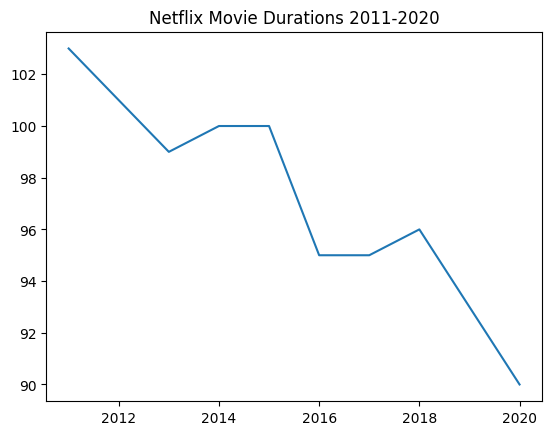

In [3]:
# Import matplotlib.pyplot under its usual alias and create a figure
import matplotlib.pyplot as plt
fig = plt.figure()

# Draw a line plot of release_years and durations
plt.plot(years, durations)

# Create a title
plt.title("Netflix Movie Durations 2011-2020")

# Show the plot
plt.show()

## 4. Loading the rest of the data from a CSV
<p>It seems like the duration is really declining, but there are a few questions about this trend that we are currently unable to answer, including:</p>
<ol>
<li>What does this trend look like over a longer period of time?</li>
<li>Is this explainable by something like the genre of entertainment?</li>
</ol>

In [4]:
# Read in the CSV as a DataFrame
netflix_df = pd.read_csv("datasets/netflix_data.csv")

# Print the first five rows of the DataFrame
print(netflix_df.head(5))

  show_id  ...             genre
0      s1  ...  International TV
1      s2  ...            Dramas
2      s3  ...     Horror Movies
3      s4  ...            Action
4      s5  ...            Dramas

[5 rows x 11 columns]


## 5. Filtering for movies
<p>Filtering data and select rows where <code>type</code> is <code>Movie</code>, as well as create a new DataFrame <code>netflix_movies</code> containing only <code>title</code>, <code>country</code>, <code>genre</code>, <code>release_year</code>, and <code>duration</code>.</p>

In [5]:
# Subset the DataFrame for type "Movie"
netflix_df_movies_only = netflix_df[netflix_df['type'] == 'Movie']

# Select only the columns of interest
netflix_movies_col_subset = netflix_df_movies_only[['title', 'country', 'genre', 'release_year','duration']]

# Print the first five rows of the new DataFrame
print(netflix_movies_col_subset.head(5))

   title        country          genre  release_year  duration
1   7:19         Mexico         Dramas          2016        93
2  23:59      Singapore  Horror Movies          2011        78
3      9  United States         Action          2009        80
4     21  United States         Dramas          2008       123
6    122          Egypt  Horror Movies          2019        95


## 6. Creating a scatter plot
<p>Because we are no longer working with aggregates but instead with individual movies. A line plot is no longer a good choice for the data</p>


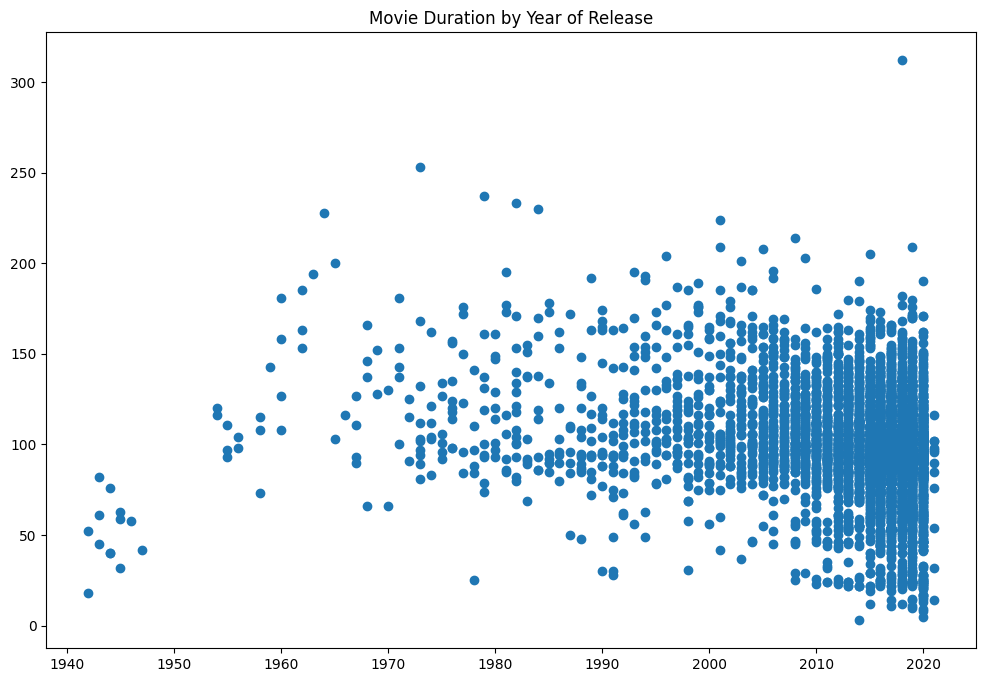

In [6]:
# Create a figure and increase the figure size
fig = plt.figure(figsize=(12,8))

# Create a scatter plot of duration versus year
plt.scatter(netflix_movies_col_subset['release_year'],netflix_movies_col_subset['duration'])

# Create a title
plt.title("Movie Duration by Year of Release")

# Show the plot
plt.show()

## 7. Digging deeper
<p>We can also see that, while newer movies are overrepresented on the platform, many short movies have been released in the past two decades.</p>
<p>Upon further inspection,some of these films are under an hour long. filtering the DataFrame for movies with a <code>duration</code> under 60 minutes and look at the genres.</p>

In [7]:
# Filter for durations shorter than 60 minutes
short_movies = netflix_movies_col_subset[netflix_movies_col_subset['duration'] < 60]

# Print the first 20 rows of short_movies
print(short_movies.head(20))

                                                 title  ... duration
35                                           #Rucker50  ...       56
55                 100 Things to do Before High School  ...       44
67   13TH: A Conversation with Oprah Winfrey & Ava ...  ...       37
101                                  3 Seconds Divorce  ...       53
146                                     A 3 Minute Hug  ...       28
162  A Christmas Special: Miraculous: Tales of Lady...  ...       22
171                         A Family Reunion Christmas  ...       29
177                    A Go! Go! Cory Carson Christmas  ...       22
178                    A Go! Go! Cory Carson Halloween  ...       22
179                  A Go! Go! Cory Carson Summer Camp  ...       21
181             A Grand Night In: The Story of Aardman  ...       59
200                            A Love Song for Latasha  ...       20
220                         A Russell Peters Christmas  ...       44
233                              A

## 8. Marking non-feature films
<p>It looks as though many of the films that are under 60 minutes fall into genres such as "Children", "Stand-Up", and "Documentaries". This is a logical result, as these types of films are probably often shorter than 90 minute Hollywood blockbuster. </p>
<p>Instead of eliminating these rows from our DataFrame and plot the values again, I chose to plot them, and mark them with a different color.</p>

In [8]:
# Define an empty list
colors = []

# Iterate over rows of netflix_movies_col_subset
for lab, row in netflix_movies_col_subset.iterrows() :
    if row['genre'] == "Children" :
        colors.append('red')
    elif row['genre'] == "Documentaries" :
        colors.append('blue')
    elif row['genre'] == "Stand-Up" :
        colors.append('green')
    else:
        colors.append('black')
        
# Inspect the first 10 values in your list        
print(colors[:10])

['black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'blue']


## 9. Plotting with color!


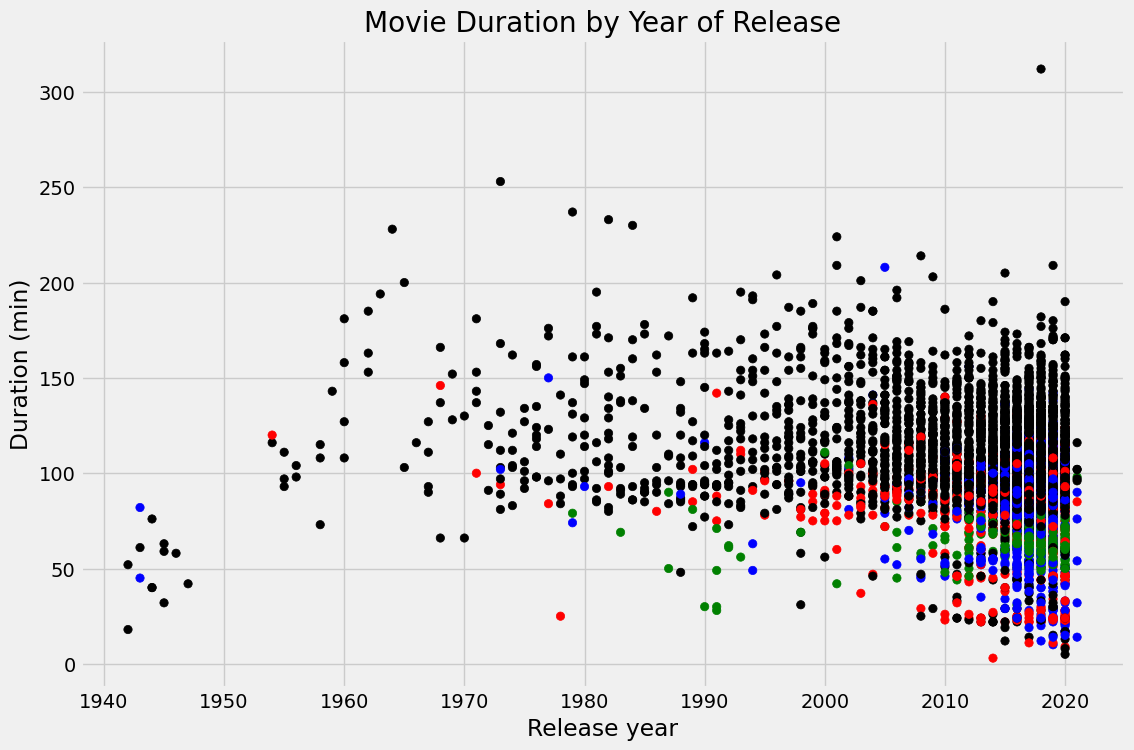

In [9]:
# Set the figure style and initalize a new figure
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(12,8))

# Create a scatter plot of duration versus release_year
plt.scatter(netflix_movies_col_subset['release_year'],netflix_movies_col_subset['duration'], c = colors)

# Create a title and axis labels
plt.title("Movie Duration by Year of Release")
plt.xlabel('Release year')
plt.ylabel('Duration (min)')

# Show the plot
plt.show()

## 10. Conclusion?
<p>Well, as we suspected, non-typical genres such as children's movies and documentaries are all clustered around the bottom half of the plot. But we can't know for certain that movies are getting shorter . </p>